In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READ IN DATA!

In [ ]:
full_file = pd.read_csv("billionaire_list_20yrs.csv")
full_file

In [ ]:
print(full_file.info())

In [ ]:
print(full_file.describe())

MANIPULATE AND CLEAN DATA

Delete unnecessary columns


In [ ]:
df = full_file.drop(['headquarters', 'state', 'name', 'last_name'], axis=1)
print(df.info())

Fill in Nulls

In [ ]:
#fill in missing genders
df['gender'] = df['gender'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['wealth_source_details'] = df['wealth_source_details'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
#replace missing permanent_country with country
df['permanent_country'] = df['permanent_country'].fillna(df['countries'])

print(df.info())

ANALYZE DATA 


Total number of Billionaires over the last 20 years

In [ ]:
#filter names by single instance


Sum of All Wealth for Each Year

In [ ]:
#filter data by years

Top 10 Billionaires and their wealth over time

Gender Data

In [ ]:
#remove duplicate names by 'time' column

#print the numbers
print('Number of Male Billionaires: ', (df['gender'].value_counts()['M']))
print('Number of Female Billionaires: ', (df['gender'].value_counts()['F']))
print('Unknown Gender: ', (df['gender'].value_counts()['Unknown']))

In [ ]:
#wealth comparisons by gender over time


Age Data

Industry Data

Text(0.5, 1.0, 'Top 10 Industries in the last 20 years')

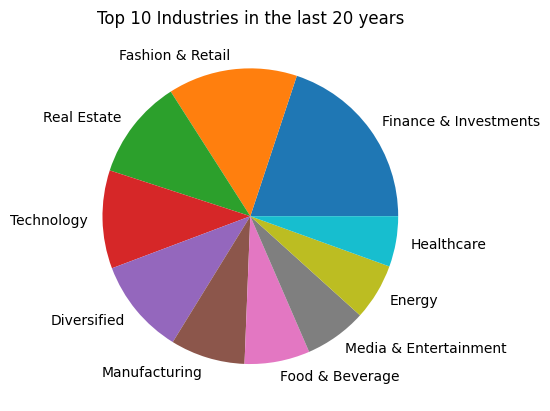

In [88]:
#grouped_by_industry = df.groupby('main_industry')
ind = df.main_industry.value_counts()
ind.head(10).plot(kind='pie')
plt.ylabel('')
plt.title("Top 10 Industries in the last 20 years")

Billionaires by Country

VISUALIZE DATA
Make 2 basic plots with matplotlib or seaborn

In [ ]:
grouped_by_source.plot(x="wealth_source_details", kind="pie")

INTERPRET DATA